In [1]:
"""
Schaefer Model / Modelo de Schaefer 

Author / Autor: imoripaolo

Based of / Baseado em: Boyce & DiPrima, ex 2.5.20 & 2.5.21 

"""

import numpy as np
import matplotlib.pyplot as plt

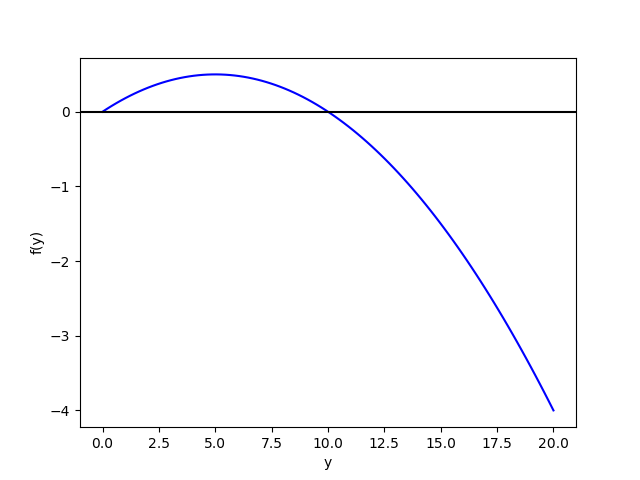

f(y_1) = 0.0 f(y_2) =  0.0


In [2]:
"""
Schaefer Model (q20): Dynamics of fish population. We can check if population rises or falls based on 
the intensity of fishing:

y' = r(1-y/K)y - Ey

r > 0: population growth rate

K > 0: carrying capacity

E in (0,r): effort of fishing

---
Modelo de Schaefer (q20): Dinâmica da população de peixes. Podemos verificar se a população aumenta ou
diminui baseado na intensidade da pesca:

y' = r(1-y/K)y - Ey

r > 0: taxa de crescimento

K > 0: capacidade de sustentação

E in (0,r): esforço de pesca

"""

r, K, E, T = 0.4, 20, 0.2, 100

y = np.linspace(0,K,T)

def f(y):
    f = r*(1-(y/K))*y - E*y
    return f

dot_y = np.zeros(T)
for i in range(0,T):
    dot_y[i] = f(y[i])

fig, ax = plt.subplots()
ax.plot(y,dot_y,'b')
plt.axhline(0, color='k', linestyle='-')
ax.set_ylabel('f(y)')
ax.set_xlabel('y')
plt.show()  

print("f(y_1) =", f(0), "f(y_2) = ", f(K*(1-(E/r))))

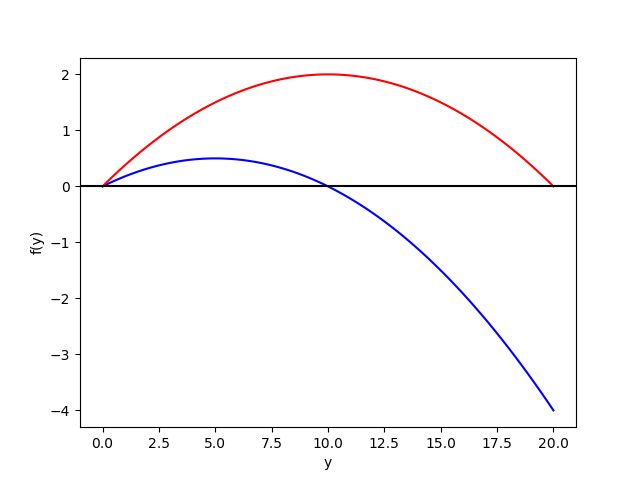

In [4]:
"""
Let's compare the dynamics of the Schaefer model with the dynamics of the basic logistic model:

y' = r(1-y/K)y
---
Vamos comparar a dinâmica do modelo de Schaefer com a dinâmica do modelo logístico básico.

y' = r(1-y/K)y
"""

def g(y):
    g = r*(1-(y/K))*y
    return g

y = np.linspace(0,K,T)

dot_y_sch = np.zeros(T)
dot_y_log = np.zeros(T)

for i in range(0,T):
    dot_y_sch[i] = f(y[i])
    dot_y_log[i] = g(y[i])

fig, ax = plt.subplots()
ax.plot(y,dot_y_sch,'b')
ax.plot(y,dot_y_log,'r')
plt.axhline(0, color='k', linestyle='-')
ax.set_ylabel('f(y)')
ax.set_xlabel('y')
plt.show() 


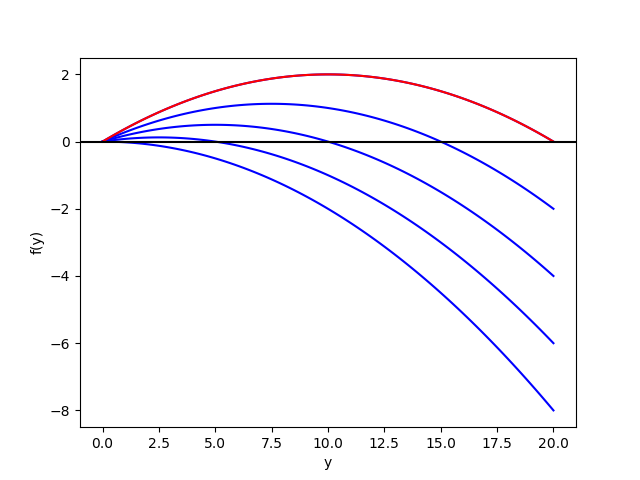

In [9]:
"""
The dynamics for different values of E
---
A dinâmica para diferentes valores de E
"""

E_space = np.linspace(0,r,5)

def h(y,I):
    h = r*(1-(y/K))*y - I*y
    return h

dot_y_E_space = np.zeros((T,5))

for i in range(0,T):
    for j in range(0,5):
        dot_y_E_space[i][j] = h(y[i],E_space[j])
        

fig, ax = plt.subplots()
ax.plot(y,dot_y_E_space,'b')
ax.plot(y,dot_y_log,'r')
plt.axhline(0, color='k', linestyle='-')
ax.set_ylabel('f(y)')
ax.set_xlabel('y')
plt.show() 


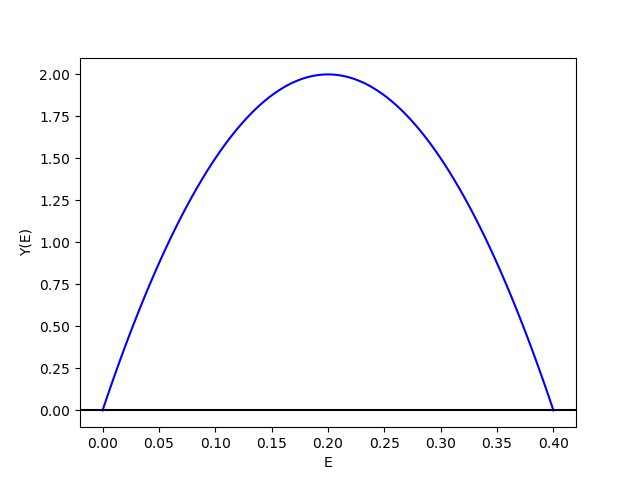

E_m = 0.2 Y_m =  2.0


In [10]:
"""
Maximum Susteinable Yield:

The value of E that maximizes production without leading to reduction of the fish population

Y(E) = Ey_2 = EK(1- E/r)

----
Máxima Produção Sustentável

O valor de E que maximiza produção sem levar a redução da população de peixe.

Y(E) = Ey_2 = EK(1- E/r)
"""

E_msy = np.linspace(0,r,T+1)

def Y(E):
    Y = E*K*(1-(E/r))
    return Y

Y_msy = np.zeros(T+1)

for i in range(0,T+1):
    Y_msy[i] = Y(E_msy[i])
    
fig, ax = plt.subplots()
ax.plot(E_msy,Y_msy,'b')
plt.axhline(0, color='k', linestyle='-')
ax.set_ylabel('Y(E)')
ax.set_xlabel('E')
plt.show()  

print("E_m =", E_msy[np.argmax(Y_msy)], "Y_m = ", Y(E_msy[np.argmax(Y_msy)]) )

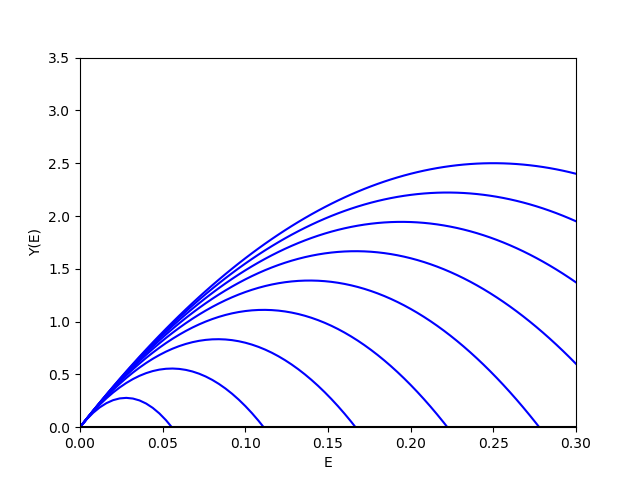

In [19]:
"""
Comparative Statics: Y(E) for different values of r

Y(E) = Ey_2 = EK(1- E/r)
----
Estática Comparativa: Y(E) para diferentes valores de r

Y(E) = Ey_2 = EK(1- E/r)
"""

r_space = np.linspace(0,0.5,10)

def Y(E,R):
    Y = E*K*(1-(E/R))
    return Y

Y_r_space = np.zeros((T+1,10))
for i in range(0,T+1):
    for j in range(0,10):
        Y_r_space[i][j] = Y(E_msy[i], r_space[j])
        


fig, ax = plt.subplots()
ax.plot(E_msy,Y_r_space,'b')
plt.axhline(0, color='k', linestyle='-')
ax.set_ylabel('Y(E)')
ax.set_xlabel('E')
plt.xlim([0, 0.3])
plt.ylim([0, 3.5])
plt.show()  

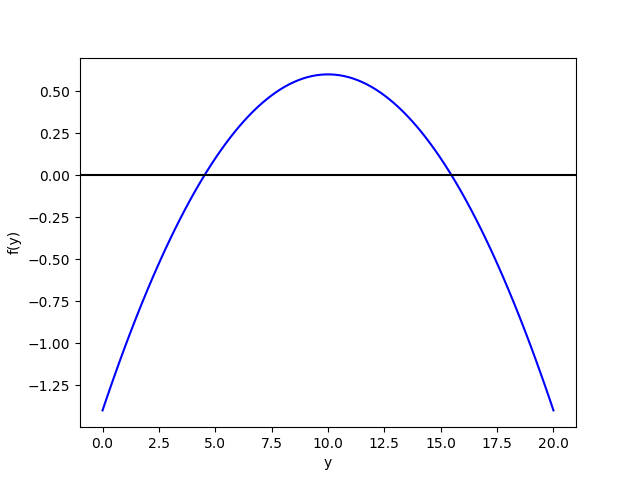

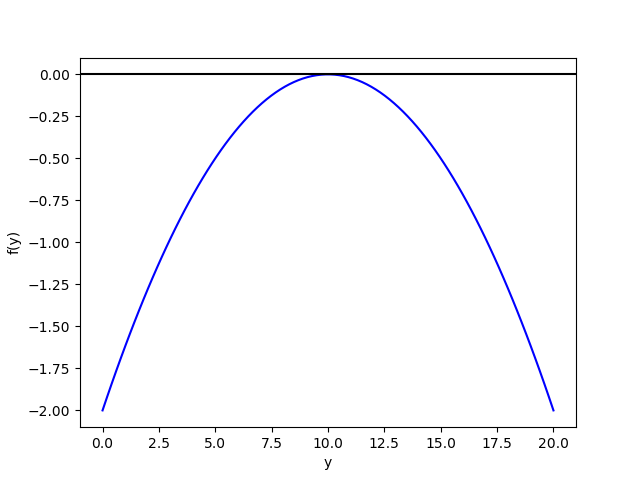

<ipython-input-20-7146b70e176e>:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


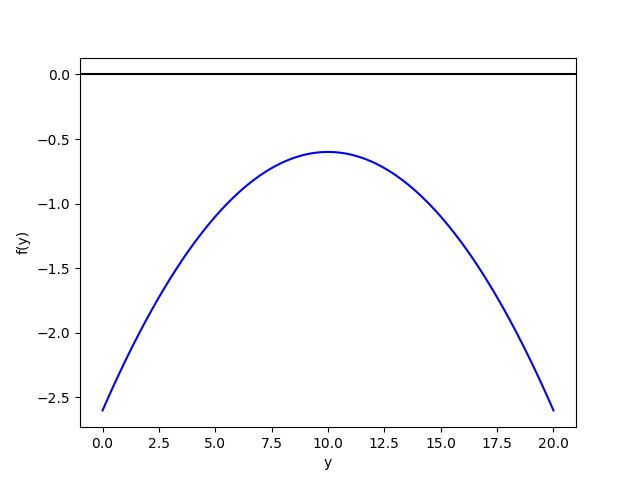

In [20]:
"""
Adaptation for Q21 / Adaptação para Q21:

y' = r(1-y/K)y - h

h > 0: constant fishing rate / taxa constante de pesca

"""

lambda1, lambda2, lambda3 = 0.7, 1, 1.3

h_1, h_2, h_3 = lambda1*r*K/4, lambda2*r*K/4, lambda3*r*K/4

def new_f(y, h):
    f = r*(1-(y/K))*y - h
    return f

y21_1,y21_2,y21_3 = np.zeros(T), np.zeros(T), np.zeros(T)
for i in range(0,T):
    y21_1[i] = new_f(y[i],h_1)
    y21_2[i] = new_f(y[i],h_2)
    y21_3[i] = new_f(y[i],h_3)

fig, ax = plt.subplots()
ax.plot(y, y21_1,'b')
plt.axhline(0, color='k', linestyle='-')
ax.set_ylabel('f(y)')
ax.set_xlabel('y')
plt.show()

fig, ax = plt.subplots()
ax.plot(y, y21_2,'b')
plt.axhline(0, color='k', linestyle='-')
ax.set_ylabel('f(y)')
ax.set_xlabel('y')
plt.show()

fig, ax = plt.subplots()
ax.plot(y, y21_3,'b')
plt.axhline(0, color='k', linestyle='-')
ax.set_ylabel('f(y)')
ax.set_xlabel('y')
plt.show()